<a href="https://colab.research.google.com/github/lpdata/fraude_bilhetagem/blob/main/notebooks/01_exploracao_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Exploratória de Dados**

## 0. Contexto e Objetivo

Este notebook tem como objetivo realizar a análise exploratória dos dados de bilhetagem,buscando compreender padrões de comportamento associados a fraudes, bem como avaliar a qualidade dos dados disponíveis para a construção de modelos preditivos.

Especial atenção será dada à variável alvo (fraude), dado o impacto negativo do bloqueio indevido de cartões legítimos.


## 1. Vinculação com Github

In [76]:
!git clone https://github.com/lpdata/fraude_bilhetagem


Cloning into 'fraude_bilhetagem'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 79 (delta 29), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (79/79), 3.08 MiB | 5.76 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [77]:
%cd fraude_bilhetagem


/content/fraude_bilhetagem/fraude_bilhetagem


In [78]:
!ls


data  notebooks  README.md  requirements.txt  src


In [79]:
!ls data/raw

dados.csv


In [80]:
import os
print("Diretório atual:", os.getcwd()) #checando se estou no diretório correto


Diretório atual: /content/fraude_bilhetagem/fraude_bilhetagem


## 2. Importação de bibliotecas


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


## 3. Carregamento dos dados

In [82]:
import pandas as pd

df = pd.read_csv("data/raw/dados.csv")
df.head()


,id_transacao,id_cartao,ts_transacao,dt_emissao_cartao,nu_recargas_acumulado,valor_transacao,tipo_cartao,status_cartao,id_dispositivo,id_motorista,linha_onibus,sentido_viagem,clima_dia,temp_externa,id_loja_ultima_recarga,tipo_pagamento_recarga,latitude,longitude,cidade,feriado,integracao_metro,limite_diario_uso,idade_usuario,sexo_usuario,diff_tempo_segundos,tempo_vida_cartao_dias,target_fraude,bloqueio_automatico_sistema
0,160,18901,2026-01-21 20:23:29,2022-10-17,27,4.5,Funcionario,Ativo,560,1155,88,Volta,Chuva,24.808733,15,Cartao_Credito,-23.519384,-46.636025,São Paulo,0,0,10,26,N,754063.0,1192,0,0
1,103,18392,2026-01-29 03:13:36,2023-06-30,142,4.5,Idoso,Ativo,597,1184,99,Volta,Chuva,26.589331,44,Dinheiro,-23.596831,-46.611252,São Paulo,0,1,10,39,F,1050052.0,944,0,0
2,22320,17050,2026-01-04 16:05:52,2020-10-29,51,4.5,Comum,Ativo,555,1118,7,Volta,Chuva,37.017011,13,PIX,-23.574280,-46.659055,São Paulo,0,0,10,45,F,25224.0,1893,0,0
3,12932,11516,2026-01-15 01:29:07,2023-09-23,34,9.0,Idoso,Ativo,500,1152,129,Volta,Chuva,29.321891,26,PIX,-23.557165,-46.658066,São Paulo,0,1,10,20,N,NaN,845,0,0
4,21,16396,2026-01-19 00:20:30,2023-01-10,78,4.5,Vale-Transporte,Ativo,563,1078,111,Ida,Chuva,24.161994,12,Cartao_Credito,-23.543473,-46.685753,São Paulo,0,0,10,45,M,507280.0,1105,0,0


## 4. Visão geral do dataset

### 4.1 Carregamento e visão inicial

In [83]:
print(f"Shape do dataset: {df.shape}")
df.head()

Shape do dataset: (30000, 28)


,id_transacao,id_cartao,ts_transacao,dt_emissao_cartao,nu_recargas_acumulado,valor_transacao,tipo_cartao,status_cartao,id_dispositivo,id_motorista,linha_onibus,sentido_viagem,clima_dia,temp_externa,id_loja_ultima_recarga,tipo_pagamento_recarga,latitude,longitude,cidade,feriado,integracao_metro,limite_diario_uso,idade_usuario,sexo_usuario,diff_tempo_segundos,tempo_vida_cartao_dias,target_fraude,bloqueio_automatico_sistema
0,160,18901,2026-01-21 20:23:29,2022-10-17,27,4.5,Funcionario,Ativo,560,1155,88,Volta,Chuva,24.808733,15,Cartao_Credito,-23.519384,-46.636025,São Paulo,0,0,10,26,N,754063.0,1192,0,0
1,103,18392,2026-01-29 03:13:36,2023-06-30,142,4.5,Idoso,Ativo,597,1184,99,Volta,Chuva,26.589331,44,Dinheiro,-23.596831,-46.611252,São Paulo,0,1,10,39,F,1050052.0,944,0,0
2,22320,17050,2026-01-04 16:05:52,2020-10-29,51,4.5,Comum,Ativo,555,1118,7,Volta,Chuva,37.017011,13,PIX,-23.574280,-46.659055,São Paulo,0,0,10,45,F,25224.0,1893,0,0
3,12932,11516,2026-01-15 01:29:07,2023-09-23,34,9.0,Idoso,Ativo,500,1152,129,Volta,Chuva,29.321891,26,PIX,-23.557165,-46.658066,São Paulo,0,1,10,20,N,NaN,845,0,0
4,21,16396,2026-01-19 00:20:30,2023-01-10,78,4.5,Vale-Transporte,Ativo,563,1078,111,Ida,Chuva,24.161994,12,Cartao_Credito,-23.543473,-46.685753,São Paulo,0,0,10,45,M,507280.0,1105,0,0


<small>***Comentários Letícia:** O dataset apresenta volume adequado para modelagem supervisionada, com 30 mil registros e 28 variáveis, permitindo análise estatística consistente e posterior desenvolvimento de modelos preditivos sem limitações computacionais com os recursos que tenho disponíveis.*</*small*>

### 4.2 Informações gerais

In [84]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_transacao                 30000 non-null  int64  
 1   id_cartao                    30000 non-null  int64  
 2   ts_transacao                 30000 non-null  object 
 3   dt_emissao_cartao            30000 non-null  object 
 4   nu_recargas_acumulado        30000 non-null  int64  
 5   valor_transacao              30000 non-null  float64
 6   tipo_cartao                  30000 non-null  object 
 7   status_cartao                30000 non-null  object 
 8   id_dispositivo               30000 non-null  int64  
 9   id_motorista                 30000 non-null  int64  
 10  linha_onibus                 30000 non-null  int64  
 11  sentido_viagem               30000 non-null  object 
 12  clima_dia                    30000 non-null  object 
 13  temp_externa    

<small>***Comentários Letícia:** A inspeção estrutural do dataset indica boa qualidade geral dos dados, com ausência quase total de valores nulos. No entanto, observservei a necessidade de conversão adequada de colunas temporais e tratamento específico para a variável diff_tempo_segundos, que apresenta valores ausentes.*</small>

### 4.3 Quantidade de valores ausentes

In [85]:
missing = (
    df.isna()
      .sum()
      .sort_values(ascending=False)
)

missing[missing > 0]


,0
diff_tempo_segundos,9483


<small>***Comentários Letícia:** busquei aqui entender melhor a variável diff_tempo_segundos, verifiquei que apresenta uma proporção relevante de valores ausentes, indicando que sua ausência pode estar associada a eventos específicos do processo de uso do cartão. Dessa forma, o seu tratamento será realizado com cautela, preciso evitar a perda de informação potencialmente relevante.*</small>

### 4.4 Estatísticas descritivas

O objetivo desta etapa é identificar automaticamente variáveis que apresentam comportamentos estatísticos atípicos ou inconsistências que podem impactar negativamente a modelagem preditiva.

Para isso, utilizo estatísticas descritivas básicas e regras simples e interpretáveis, que permitem:

*  Detectar valores ausentes a partir da contagem de registros (count);
*   Identificar valores mínimos negativos em variáveis que, conceitualmente, não deveriam assumir esse domínio;
*   Sinalizar variáveis constantes, que não agregam informação ao modelo;
*   Evidenciar possíveis outliers extremos, comparando o valor máximo com o terceiro quartil;
*   A visualização utiliza destaque por cores para facilitar a inspeção manual:


🔴 Vermelho: estatística com possível anomalia;

🟡 Amarelo: feature que requer uma avaliação mais minuciosa.

Gosto da abordagem visual porque me possibilita uma análise mais objetiva, rastreável e reprodutível.

In [86]:
desc = df.describe().T.reset_index()

# Renomeia a coluna que contém o nome das variáveis
desc.rename(columns={'index': 'feature'}, inplace=True)

# Total de registros do dataset (referência para detectar missing values)
total_linhas = df.shape[0]


def highlight_anomalies(row):

    #Aplica regras de destaque visual para identificar anomalias estatísticas em cada feature.

    styles = [''] * len(row)
    feature_has_issue = False

    for i, col in enumerate(desc.columns):

        value = row[col]

        # Ignora valores não numéricos ou ausentes
        if not isinstance(value, (int, float, np.number)) or pd.isna(value):
            continue

        # Count menor que o total de linhas → valores ausentes
        if col == 'count' and value < total_linhas:
            styles[i] = 'background-color: #ff2800'
            feature_has_issue = True

        # Valor mínimo negativo → possível erro de domínio
        if col == 'min' and value < 0:
            styles[i] = 'background-color: #ff2800'
            feature_has_issue = True

        # Desvio padrão zero → variável constante
        if col == 'std' and value == 0:
            styles[i] = 'background-color: #ff2800'
            feature_has_issue = True

        # Valor máximo muito superior ao 3º quartil → possível outlier extremo
        if col == 'max' and value > row['75%'] * 10:
            styles[i] = 'background-color: #ff2800'
            feature_has_issue = True

    # Destaca o nome da feature se houver qualquer alerta
    if feature_has_issue:
        styles[0] = 'background-color: #ffc222'

    return styles


# Aplica o estilo ao DataFrame
desc.style.apply(highlight_anomalies, axis=1)





,feature,count,mean,std,min,25%,50%,75%,max
0,id_transacao,30000.000000,15000.500000,8660.398374,1.000000,7500.750000,15000.500000,22500.250000,30000.000000
1,id_cartao,30000.000000,14987.483333,2889.883977,10000.000000,12483.000000,14994.000000,17480.250000,19999.000000
2,nu_recargas_acumulado,30000.000000,75.064733,43.106741,1.000000,37.000000,75.000000,112.000000,149.000000
3,valor_transacao,30000.000000,12.252450,80.967213,0.000000,4.500000,4.500000,9.000000,999.990000
4,id_dispositivo,30000.000000,549.641400,28.984514,500.000000,524.000000,550.000000,575.000000,599.000000
5,id_motorista,30000.000000,1099.681100,57.905708,1000.000000,1049.000000,1100.000000,1150.000000,1199.000000
6,linha_onibus,30000.000000,74.750433,43.079795,1.000000,38.000000,75.000000,112.000000,149.000000
7,temp_externa,30000.000000,25.012047,5.014549,5.684604,21.651101,25.009458,28.371330,46.809151
8,id_loja_ultima_recarga,30000.000000,25.216867,14.175013,1.000000,13.000000,25.000000,37.000000,49.000000
9,latitude,30000.000000,-23.549852,0.028876,-23.600000,-23.574873,-23.549953,-23.524817,-23.500002


<small>***Comentários Letícia:** Ao analisar as estatísticas descritivas com o apoio do destaque automático de anomalias, observei que o dataset é, de forma geral, consistente e apresenta boa distribuição das variáveis. Ainda assim, algumas features chamaram atenção e demandam uma avaliação mais minuciosa nas próximas etapas do trabalho.*

*Identifiquei valores potencialmente incoerentes em variáveis como idade_usuario e tempo_vida_cartao_dias, incluindo registros negativos, o que sugere possíveis erros de cadastro ou problemas na carga dos dados. Essas inconsistências deverão ser tratadas para evitar viés ou distorções no modelo.*

*ariáveis como valor_transacao e diff_tempo_segundos apresentaram valores extremos, que podem representar tanto comportamentos legítimos quanto padrões associados à fraude. Por esse motivo, esses casos serão analisados com cautela, priorizando técnicas de tratamento que preservem informação relevante para a modelagem.*

*Também observei variáveis sem variabilidade, como limite_diario_uso, que não agregam poder discriminativo ao modelo e poderão ser descartadas ou reavaliadas durante a etapa de seleção de features.*

*Por fim, observei um forte alinhamento entre a variável bloqueio_automatico_sistema e o target_fraude, o que indica que essa variável reflete decisões tomadas após a identificação da fraude. Apesar de ser relevante do ponto de vista operacional, sua utilização como variável explicativa poderia introduzir vazamento de informação, uma vez que ela representa uma ação posterior à transação. Por esse motivo, essa variável será utilizada apenas para análise e validação do processo atual, sendo excluída da modelagem preditiva.*</small>

### 4.5 Análise do target

In [87]:
df['target_fraude'].value_counts(normalize=True) * 100


,proportion
target_fraude,
0,90.216667
1,9.783333


In [88]:
df['target_fraude'].value_counts()


,count
target_fraude,
0,27065
1,2935


<small>***Comentários Letícia:** Ao analisar a variável alvo, observei que o dataset apresenta um forte desbalanceamento, com aproximadamente 10% das transações classificadas como fraude. Esse cenário reforça a necessidade de utilizar métricas de avaliação mais adequadas ao problema, evitando decisões baseadas apenas em acurácia. Além disso, considerando o impacto negativo dos falsos positivos para o negócio, esse desbalanceamento será levado em conta nas próximas etapas de modelagem e avaliação.*</small>

### 4.6 Separação por tipo de variável

In [89]:
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
colunas_categoricas = df.select_dtypes(include=['object']).columns

print("Numéricas:", len(colunas_numericas))
print(colunas_numericas)

print("\nCategóricas:", len(colunas_categoricas))
print(colunas_categoricas)


Numéricas: 19
Index(['id_transacao', 'id_cartao', 'nu_recargas_acumulado', 'valor_transacao',
       'id_dispositivo', 'id_motorista', 'linha_onibus', 'temp_externa',
       'id_loja_ultima_recarga', 'latitude', 'longitude', 'feriado',
       'integracao_metro', 'limite_diario_uso', 'idade_usuario',
       'diff_tempo_segundos', 'tempo_vida_cartao_dias', 'target_fraude',
       'bloqueio_automatico_sistema'],
      dtype='object')

Categóricas: 9
Index(['ts_transacao', 'dt_emissao_cartao', 'tipo_cartao', 'status_cartao',
       'sentido_viagem', 'clima_dia', 'tipo_pagamento_recarga', 'cidade',
       'sexo_usuario'],
      dtype='object')


<small>***Comentário Letícia:** Realizei a separação das variáveis por tipo para orientar as próximas etapas de tratamento e engenharia de features. Essa distinção será essencial para aplicar técnicas adequadas de transformação, codificação e normalização, respeitando as características de cada grupo de variáveis.*</small>

### 4.7 Datas

In [90]:
colunas_datas = ['ts_transacao', 'dt_emissao_cartao']

for col in colunas_datas:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df[colunas_datas].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ts_transacao       30000 non-null  datetime64[ns]
 1   dt_emissao_cartao  30000 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 468.9 KB


<small>***Comentário Letícia:** Nesta etapa, realizei apenas a conversão e validação do formato das variáveis temporais, garantindo que ts_transacao e dt_emissao_cartao estejam corretamente representadas como datas. O objetivo aqui foi verificar a consistência e a qualidade dessas informações, sem realizar ainda qualquer tipo de tratamento ou extração de atributos temporais.*<small>

## 5. Análise da variável alvo

**Objetivo desta etapa**

Entender profundamente o comportamento da variável que queremos prever, identificar desafios como desbalanceamento e avaliar implicações diretas para a modelagem.

###5.1 Distribuição do target

In [91]:
target_dist = (
    df['target_fraude']
    .value_counts()
    .to_frame(name='count')
)

target_dist['proportion_%'] = (
    target_dist['count'] / target_dist['count'].sum() * 100
)

target_dist


,count,proportion_%
target_fraude,,
0,27065,90.216667
1,2935,9.783333


<small>***Comentários Letícia:** Ao analisar a distribuição da variável alvo, observei um forte desbalanceamento entre as classes, com aproximadamente 90% das transações classificadas como normais e apenas cerca de 10% confirmadas como fraude. Esse comportamento é esperado em cenários reais de detecção de fraude, mas traz implicações importantes para a modelagem, pois métricas tradicionais como acurácia podem ser enganosas. Essa análise reforça a necessidade de adotar métricas e estratégias que priorizem a correta identificação de fraudes, sem desconsiderar o impacto de falsos positivos no negócio.*</small>

### 5.2 Visualização simples do target

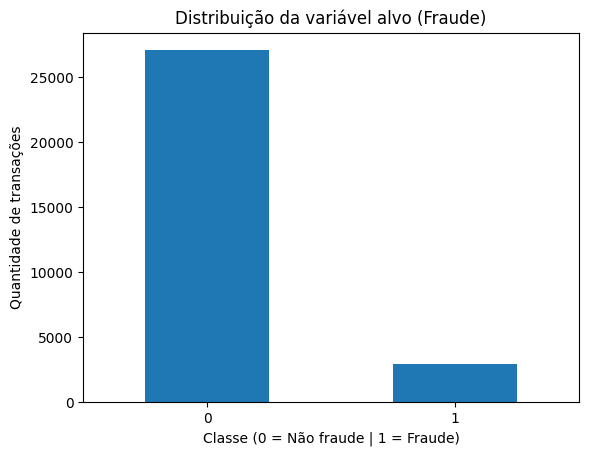

In [92]:
import matplotlib.pyplot as plt

df['target_fraude'].value_counts().plot(
    kind='bar',
    title='Distribuição da variável alvo (Fraude)',
    ylabel='Quantidade de transações',
    xlabel='Classe (0 = Não fraude | 1 = Fraude)',
    rot=0
)

plt.show()


<small>***Comentários Letícia:** A visualização gráfica reforça de forma clara o desbalanceamento já identificado na análise numérica. A predominância da classe não fraudulenta fica evidente, o que facilita a comunicação do problema e reforça a necessidade de cuidados específicos durante a modelagem para evitar que o modelo aprenda apenas o comportamento majoritário.*</small>

### 5.3 Implicações diretas para a modelagem

Com base nos resultados observados, concluo que o problema de
detecção de fraude apresenta um desbalanceamento significativo entre as classes, o que impacta diretamente a estratégia de modelagem. Métricas tradicionais como acurácia não são adequadas nesse contexto, pois podem mascarar um desempenho ruim na identificação de fraudes.

Dessa forma, será necessário priorizar métricas que avaliem melhor o desempenho sobre a classe minoritária, como recall, precision, F1-score e curvas ROC/PR. Além disso, o desbalanceamento observado indica a necessidade de avaliar técnicas como uso de pesos de classe ou métodos de reamostragem, sempre considerando o impacto de falsos positivos, que representam um dos principais problemas de negócio apontados no desafio.

### 5.4 Considerações sobre vazamento de informação

A análise da variável alvo, em conjunto com as etapas anteriores, reforça a importância de avaliar cuidadosamente quais variáveis estarão disponíveis no momento da decisão preditiva. Em problemas de fraude, é comum que alguns atributos sejam consequência direta do próprio processo de detecção, e não causas do evento fraudulento.

O entendimento da distribuição do target e do contexto de negócio será essencial para evitar o uso de informações que só estariam disponíveis após a confirmação da fraude, o que configuraria vazamento de informação. Essa preocupação será considerada nas próximas etapas, especialmente durante a seleção de variáveis e na construção dos modelos preditivos, garantindo a validade e a aplicabilidade prática dos resultados.

## 6. Análise temporal

**Objetivo desta etapa**

Busca analisar o comportamento temporal das transações, almejando identificar padrões relacionados ao momento em que as fraudes ocorrem. A partir da exploração de variáveis como horário da transação, dia da semana e tempo de vida do cartão, esta etapa visa levantar hipóteses sobre comportamentos recorrentes que possam diferenciar transações legítimas de fraudulentas. As análises realizadas aqui têm caráter exploratório e servirão de base para a definição de atributos temporais relevantes nas etapas posteriores de engenharia de features e modelagem.

### 6.1 Garantia de tipos temporais

In [93]:
# Garantindo que as colunas temporais estão no formato correto
df['ts_transacao'] = pd.to_datetime(df['ts_transacao'])
df['dt_emissao_cartao'] = pd.to_datetime(df['dt_emissao_cartao'])

df[['ts_transacao', 'dt_emissao_cartao']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ts_transacao       30000 non-null  datetime64[ns]
 1   dt_emissao_cartao  30000 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 468.9 KB


### 6.2 Distribuição de fraudes ao longo do dia

In [94]:
df['hora_transacao'] = df['ts_transacao'].dt.hour

fraude_por_hora = (
    df.groupby('hora_transacao')['target_fraude']
      .mean()
      .reset_index()
)

fraude_por_hora


,hora_transacao,target_fraude
0,0,0.092308
1,1,0.086093
2,2,0.098150
3,3,0.094185
4,4,0.105388
5,5,0.086469
6,6,0.099231
7,7,0.090426
8,8,0.092430
9,9,0.118699


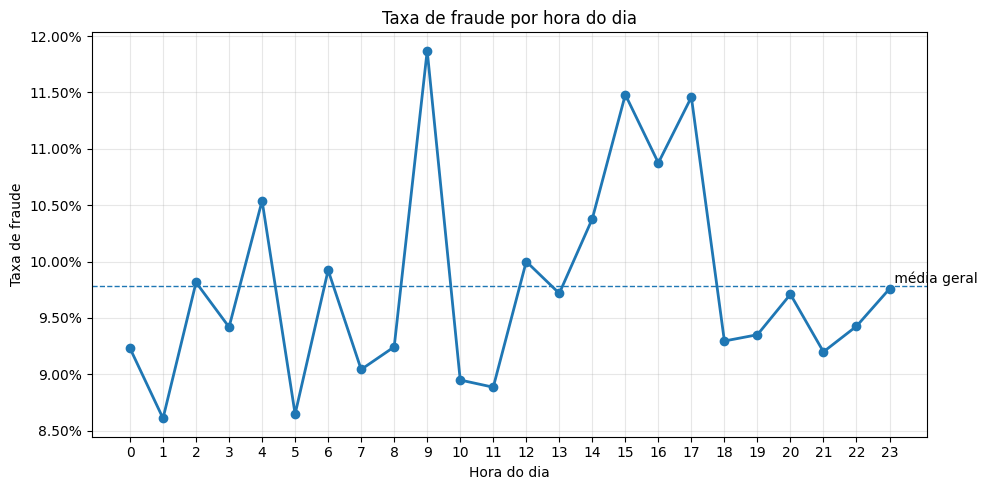

In [95]:
import matplotlib.ticker as mtick

taxa_por_hora = df.groupby('hora_transacao')['target_fraude'].mean()
volume_por_hora = df.groupby('hora_transacao')['target_fraude'].size()

taxa_media = df['target_fraude'].mean()

plt.figure(figsize=(10, 5))

plt.plot(taxa_por_hora.index, taxa_por_hora.values, marker='o', linewidth=2)

plt.axhline(taxa_media, linestyle='--', linewidth=1)
plt.text(23, taxa_media, ' média geral', va='bottom')

plt.title('Taxa de fraude por hora do dia')
plt.xlabel('Hora do dia')
plt.ylabel('Taxa de fraude')

plt.xticks(range(0, 24, 1))
plt.grid(alpha=0.3)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

plt.tight_layout()
plt.show()



<small>***Comentários Letícia:** A análise da taxa de fraude ao longo do dia indica variações moderadas entre os diferentes horários, com a presença de alguns picos pontuais. Embora não exista um padrão temporal fortemente discriminante de forma isolada, o horário da transação demonstra potencial informativo e poderá contribuir para a modelagem quando combinado com outras variáveis temporais e de perfil do usuário.*</small>

### 6.3 Fraude por dia da semana

In [96]:
df['dia_semana'] = df['ts_transacao'].dt.dayofweek

fraude_por_dia = (
    df.groupby('dia_semana')['target_fraude']
      .mean()
      .reset_index()
)

fraude_por_dia


,dia_semana,target_fraude
0,0,0.103525
1,1,0.091764
2,2,0.097361
3,3,0.094716
4,4,0.101359
5,5,0.095708
6,6,0.100277


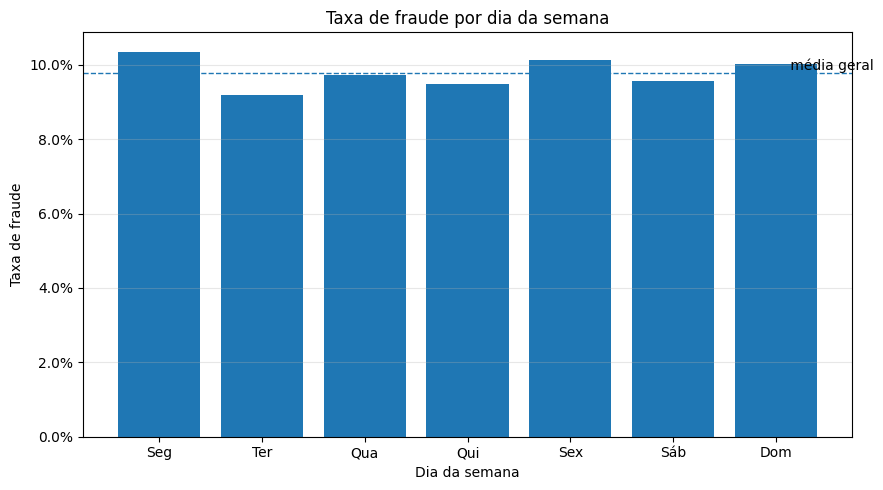

In [97]:
import matplotlib.ticker as mtick

dias = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']
taxa_por_dia = df.groupby('dia_semana')['target_fraude'].mean()
taxa_media = df['target_fraude'].mean()

plt.figure(figsize=(9, 5))
plt.bar(taxa_por_dia.index, taxa_por_dia.values)

plt.axhline(taxa_media, linestyle='--', linewidth=1)
plt.text(6.1, taxa_media, ' média geral', va='bottom')

plt.xticks(range(7), dias)
plt.ylabel('Taxa de fraude')
plt.xlabel('Dia da semana')
plt.title('Taxa de fraude por dia da semana')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()



<small>***Comentário Letícia:** A análise da taxa de fraude por dia da semana indica variações discretas ao longo do ciclo semanal, sem a presença de um padrão fortemente discriminante entre dias úteis e finais de semana. Embora o efeito isolado seja moderado, o dia da semana pode contribuir para a modelagem quando combinado com outras variáveis temporais, como o horário da transação.*</small>

### 6.4 Idade do cartão × fraude (tempo de vida)

/tmp/ipython-input-3710118007.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


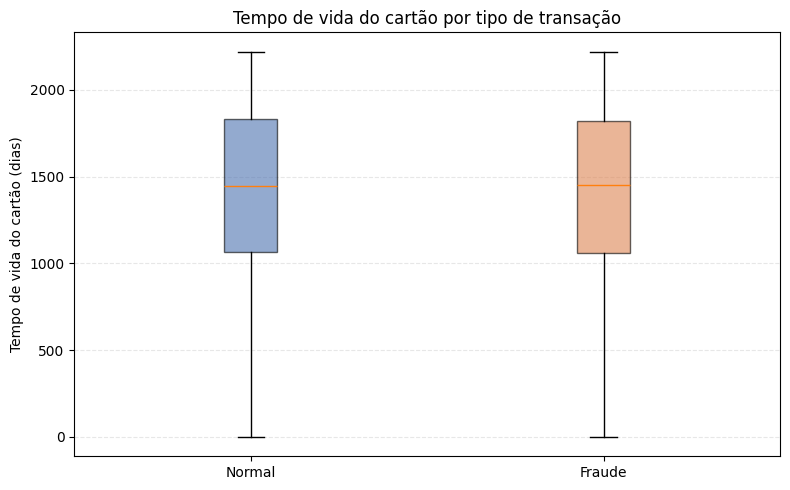

In [98]:
plt.figure(figsize=(8, 5))

box = plt.boxplot(
    [
        df[df['target_fraude'] == 0]['tempo_vida_cartao_dias'],
        df[df['target_fraude'] == 1]['tempo_vida_cartao_dias']
    ],
    labels=['Normal', 'Fraude'],
    patch_artist=True
)

cores = ['#4C72B0', '#DD8452']
for patch, cor in zip(box['boxes'], cores):
    patch.set_facecolor(cor)
    patch.set_alpha(0.6)

plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.ylabel('Tempo de vida do cartão (dias)')
plt.title('Tempo de vida do cartão por tipo de transação')

plt.tight_layout()
plt.show()



<small>***Comentários Letícia:**
A comparação do tempo de vida do cartão entre transações normais e fraudulentas indica distribuições muito semelhantes, com medianas e dispersões próximas entre os grupos. Esse resultado sugere que a idade do cartão, de forma isolada, não é um fator fortemente discriminante para fraude, embora possa contribuir para a modelagem quando combinada com outras variáveis de perfil e comportamento.*</small>

### 6.5 Análise de fraude por cidade

In [99]:
fraude_por_cidade = (
    df.groupby('cidade')['target_fraude']
      .mean()
      .sort_values(ascending=False)
      .reset_index()
)

fraude_por_cidade.head(10)


,cidade,target_fraude
0,São Paulo,0.097833


<small>***Comentários Letícia:**
A análise da variável cidade indica que todas as transações do conjunto de dados estão concentradas em uma única localidade. Dessa forma, não há variabilidade regional suficiente para avaliar diferenças na taxa de fraude, tornando essa variável pouco informativa para a modelagem preditiva neste contexto.*</small>

### 6.6 Integração com metrô × fraude

In [100]:
fraude_integracao = (
    df.groupby('integracao_metro')['target_fraude']
      .mean()
      .reset_index()
)

fraude_integracao


,integracao_metro,target_fraude
0,0,0.096054
1,1,0.099613


<small>***Comentários Letícia:**
A análise da integração com o metrô indica uma taxa de fraude levemente superior nas transações integradas em comparação às não integradas. Embora a diferença observada seja pequena, o resultado sugere que a integração tarifária pode estar associada a padrões operacionais distintos, devendo ser considerada como uma variável complementar na modelagem.*</small>

### 6.7 Limite diário de uso × fraude

In [101]:
df.groupby('limite_diario_uso')['target_fraude'].mean()


,target_fraude
limite_diario_uso,
10,0.097833


<small>***Comentários Letícia:** A análise do limite diário de uso mostra que essa variável assume um único valor em todo o conjunto de dados, não apresentando variabilidade suficiente para avaliar sua relação com a ocorrência de fraude. Dessa forma, o limite diário de uso não se mostra informativo neste contexto, embora possa ser relevante em bases com políticas de uso mais heterogêneas.*</small>

### 6.8 Análise espacial simplificada (latitude e longitude)

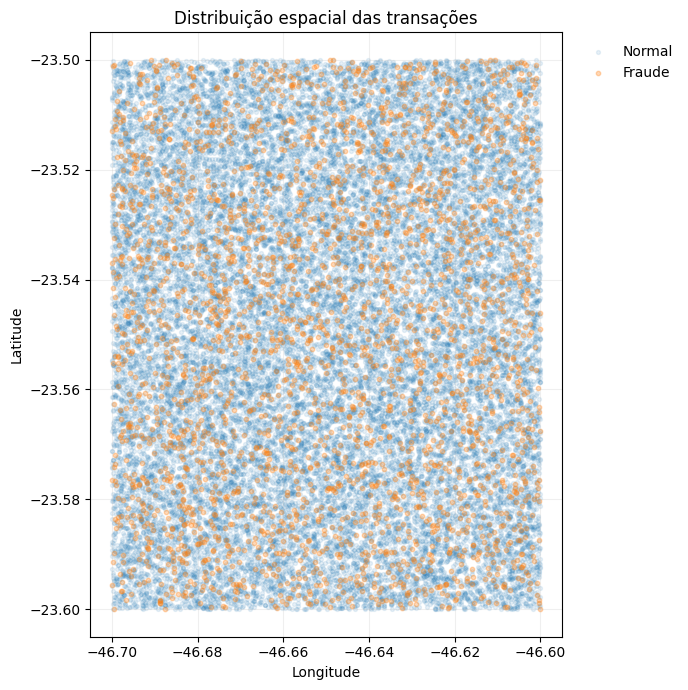

In [102]:
plt.figure(figsize=(7, 7))

plt.scatter(
    df[df['target_fraude'] == 0]['longitude'],
    df[df['target_fraude'] == 0]['latitude'],
    alpha=0.1,
    s=8,
    label='Normal'
)

plt.scatter(
    df[df['target_fraude'] == 1]['longitude'],
    df[df['target_fraude'] == 1]['latitude'],
    alpha=0.3,
    s=10,
    label='Fraude'
)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribuição espacial das transações')


plt.legend(
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    frameon=False
)

plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()



<small>***Comentários Letícia:** A análise espacial das transações indica forte sobreposição geográfica entre transações normais e fraudulentas, sem a presença de concentrações regionais exclusivas de fraude. Esse resultado sugere que as coordenadas geográficas, de forma isolada, não apresentam poder discriminante relevante, embora possam ser exploradas indiretamente em combinação com outras variáveis de contexto.*</small>

### 6.9 Idade do usuário × fraude

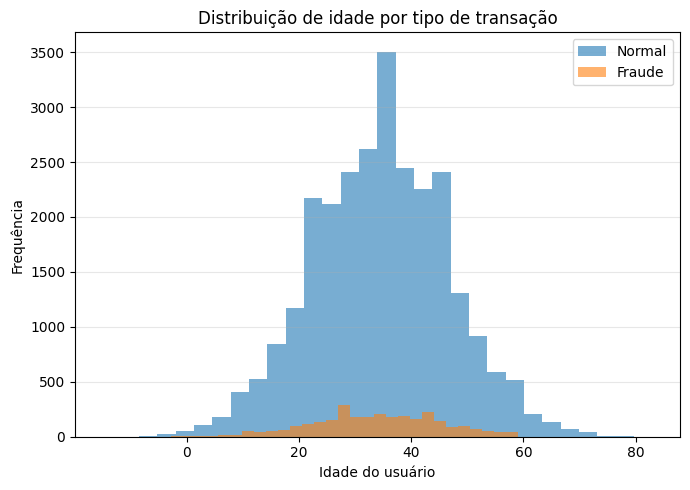

In [103]:
plt.figure(figsize=(7,5))

plt.hist(
    df[df['target_fraude'] == 0]['idade_usuario'],
    bins=30,
    alpha=0.6,
    label='Normal'
)

plt.hist(
    df[df['target_fraude'] == 1]['idade_usuario'],
    bins=30,
    alpha=0.6,
    label='Fraude'
)

plt.xlabel('Idade do usuário')
plt.ylabel('Frequência')
plt.title('Distribuição de idade por tipo de transação')


plt.grid(axis='y', alpha=0.3)

plt.legend()
plt.tight_layout()
plt.show()



<small>***Comentários Letícia:**
A análise da distribuição etária dos usuários indica que as transações fraudulentas apresentam um perfil de idade semelhante ao das transações normais, sem concentração evidente em faixas etárias específicas. Esse resultado sugere que a idade do usuário, de forma isolada, não é um fator fortemente discriminante para fraude, podendo ganhar relevância quando combinada com outras variáveis de perfil e comportamento.*</small>

### 6.10 Sexo do usuário × fraude

In [104]:
df.groupby('sexo_usuario')['target_fraude'].mean().sort_values(ascending=False)


,target_fraude
sexo_usuario,
N,0.098847
F,0.097615
M,0.097042


<small>***Comentários Letícia:**
A análise da taxa de fraude por sexo do usuário indica comportamento bastante homogêneo entre as categorias, com diferenças pouco expressivas. Esse resultado sugere que o sexo do usuário, de forma isolada, não apresenta poder discriminante relevante para a identificação de fraudes, podendo ser utilizado apenas como variável complementar na modelagem.*<small>

### 6.11 Tipo de pagamento da recarga × fraude

In [105]:
fraude_pagamento = (
    df.groupby('tipo_pagamento_recarga')['target_fraude']
      .mean()
      .sort_values(ascending=False)
)

fraude_pagamento


,target_fraude
tipo_pagamento_recarga,
Cartao_Credito,0.098423
PIX,0.098236
Dinheiro,0.096826


<small>***Comentários Letícia:** A análise da taxa de fraude por tipo de pagamento da recarga não evidenciou diferenças relevantes entre os métodos avaliados, indicando que essa variável não possui poder discriminante de forma isolada. No entanto, o tipo de pagamento pode fornecer contexto adicional quando combinado com outras informações de perfil e comportamento, como frequência de recargas, valor das transações e tipo de cartão, podendo contribuir indiretamente para a modelagem preditiva.*</small>

### 6.12 Tipo de cartão × fraude

In [106]:
fraude_tipo_cartao = (
    df.groupby('tipo_cartao')['target_fraude']
      .mean()
      .sort_values(ascending=False)
)

fraude_tipo_cartao


,target_fraude
tipo_cartao,
Idoso,0.487679
Estudante,0.000334
Funcionario,0.000333
Vale-Transporte,0.000168
Comum,0.000166


<small>***Comentários Letícia:**
A análise da taxa de fraude por tipo de cartão revelou uma assimetria significativa entre as categorias, com destaque para o cartão de idoso, que apresentou uma taxa de fraude substancialmente superior às demais. Esse resultado sugere a presença de padrões específicos de uso ou exploração desse benefício. No entanto, considerando a possibilidade de viés associado ao volume de transações ou a regras operacionais específicas, esse achado deve ser interpretado com cautela e aprofundado nas próximas etapas, especialmente por meio da análise conjunta de taxa e volume.*</small>

### 6.13 Valor da transação × fraude

/tmp/ipython-input-2294409487.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


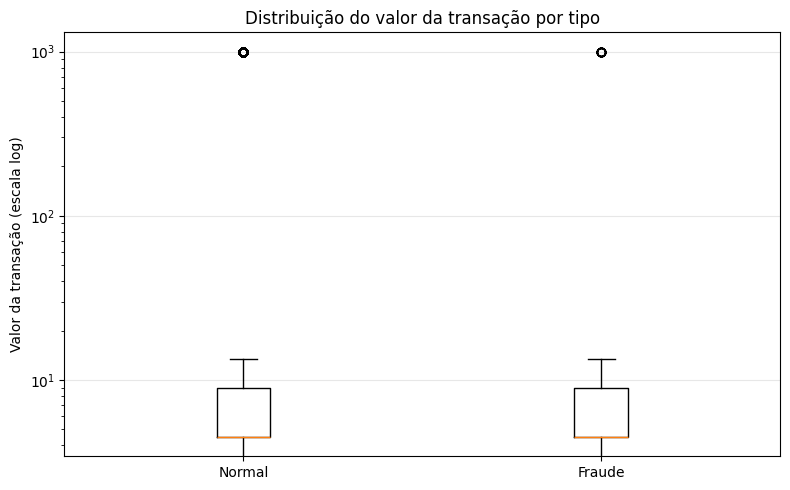

In [107]:
plt.figure(figsize=(8, 5))

plt.boxplot(
    [
        df[df['target_fraude'] == 0]['valor_transacao'],
        df[df['target_fraude'] == 1]['valor_transacao']
    ],
    labels=['Normal', 'Fraude'],
    showfliers=True
)

plt.yscale('log')
plt.ylabel('Valor da transação (escala log)')
plt.title('Distribuição do valor da transação por tipo')

plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


<small>***Comentários Letícia:** A análise exploratória do valor da transação, conduzida de forma isolada, não evidenciou diferenças relevantes entre transações normais e fraudulentas. Esse resultado indica que o valor, por si só, não apresenta padrão temporal ou comportamental suficientemente discriminante nesta etapa. No entanto, esse achado levanta a hipótese de que o valor da transação possa adquirir relevância apenas quando analisado em conjunto com outras variáveis, o que será explorado nas etapas posteriores.*</small>

### 6.14 Linha de ônibus × fraude

In [108]:
fraude_linha = (
    df.groupby('linha_onibus')['target_fraude']
      .mean()
      .sort_values(ascending=False)
)

fraude_linha.head(10)


,target_fraude
linha_onibus,
140,0.154229
18,0.145729
82,0.144796
14,0.137056
67,0.136126
13,0.131579
100,0.131068
2,0.129808
75,0.129630


<small>***Comentários Letícia:** A análise da taxa de fraude por linha de ônibus indica variação moderada entre diferentes linhas, com algumas apresentando incidência superior à média do conjunto de dados. Esse comportamento sugere que fatores operacionais associados às rotas podem influenciar o risco de fraude. No entanto, considerando que a taxa isolada não incorpora o volume de transações, esse resultado deve ser interpretado de forma exploratória e aprofundado posteriormente em análises conjuntas.*<small>

### 6.15 Síntese da Etapa 6: Análise Temporal, Espacial e de Contexto Operacional

As análises exploratórias realizadas nesta etapa indicam que a ocorrência de fraudes no sistema de bilhetagem não está associada a padrões simples ou isolados relacionados ao tempo da transação, à localização geográfica ou ao perfil demográfico dos usuários. Variáveis temporais, como horário, dia da semana e tempo de vida do cartão, apresentaram variações discretas, sem comportamento recorrente capaz de diferenciar de forma clara transações fraudulentas das normais. De maneira semelhante, as análises espaciais não evidenciaram concentrações geográficas específicas de fraude, com forte sobreposição entre os padrões espaciais observados.

Variáveis demográficas e operacionais analisadas de forma isolada, como idade, sexo do usuário, tipo de pagamento da recarga, limite diário de uso e valor da transação, mostraram comportamento homogêneo entre os grupos, indicando baixo poder discriminante quando consideradas individualmente. Por outro lado, algumas variáveis de contexto operacional, como tipo de cartão e linha de ônibus, apresentaram maior variação na taxa de fraude, configurando indícios relevantes que devem ser interpretados com cautela, especialmente à luz do volume de transações e de possíveis regras operacionais específicas.

De forma geral, os resultados desta etapa sugerem que a fraude possui natureza predominantemente comportamental e contextual, não se manifestando de forma evidente por meio de atributos isolados. Esses achados reforçam a necessidade de avançar para abordagens baseadas em histórico, frequência e interações entre variáveis, que serão exploradas na etapa seguinte de engenharia de features.

## 7. Análise de comportamento de uso

Objetivo desta Etapa

Busca construir atributos derivados capazes de capturar padrões comportamentais e operacionais associados à fraude, a partir das variáveis exploradas nas etapas anteriores. Diferentemente da análise exploratória, esta fase foca na transformação e agregação de informações, visando aumentar o poder discriminante dos dados para a modelagem preditiva. As decisões tomadas aqui serão guiadas pelas hipóteses levantadas na Etapa 6 e alinhadas ao contexto do problema de negócio.

### 7.1 Preparação para engenharia de features

In [109]:
# Ordenação temporal por cartão
df = df.sort_values(by=['id_cartao', 'ts_transacao']).reset_index(drop=True)


<small>***Comentários Letícia:** Nesta etapa inicial de preparação, os dados foram ordenados temporalmente por cartão, garantindo que todas as transformações subsequentes respeitem a sequência real de uso. Essa ordenação é fundamental para a criação de atributos comportamentais consistentes e para evitar vazamento de informação ao longo do processo de modelagem.*</small>

### 7.2 Features temporais baseadas em histórico

In [113]:
# Calcula o tempo desde a última transação por cartão (em minutos)
# Observação: a primeira transação de cada cartão resultará em NaN
df['tempo_desde_ultima_transacao_min'] = (
    df.groupby('id_cartao')['ts_transacao']
      .diff()
      .dt.total_seconds()
      .div(60)
)

# Indicador de uso em intervalo muito curto (menos de 5 minutos)
df['uso_intervalo_curto'] = (
    df['tempo_desde_ultima_transacao_min'] < 5
).astype(int)

# Tempo desde a última transação (em horas)
df['tempo_desde_ultima_transacao_horas'] = (
    df['tempo_desde_ultima_transacao_min'] / 60
)

# Mensagem de saída
features_criadas = [
    'tempo_desde_ultima_transacao_min',
    'uso_intervalo_curto',
    'tempo_desde_ultima_transacao_horas'
]

print(f"Features temporais criadas com sucesso: {', '.join(features_criadas)}")


Features temporais criadas com sucesso: tempo_desde_ultima_transacao_min, uso_intervalo_curto, tempo_desde_ultima_transacao_horas


<small>***Comentários Letícia:** Nesta etapa, foram criadas variáveis temporais baseadas no intervalo entre transações consecutivas de cada cartão, com o objetivo de capturar padrões de uso atípicos ao longo do tempo. Essas features permitem identificar situações de reutilização em curto intervalo, frequentemente associadas a comportamentos suspeitos em sistemas de bilhetagem, e servirão de base para a análise de frequência e intensidade de uso nas etapas seguintes.*</small>

### 7.3 Features de frequência e intensidade de uso

In [116]:
import pandas as pd

# Garantia de ordenação temporal
df = df.sort_values(by=['id_cartao', 'ts_transacao']).reset_index(drop=True)

# Quantidade de transações nas últimas 24 horas (por cartão)
def _rolling_count_24h(grp: pd.DataFrame) -> pd.Series:
    grp = grp.sort_values('ts_transacao')
    counts = (
        grp.set_index('ts_transacao')['id_transacao']
           .rolling('24h')
           .count()
           .to_numpy()
    )
    return pd.Series(counts, index=grp.index)

df['qtd_transacoes_24h'] = (
    df.groupby('id_cartao', group_keys=False)
      .apply(_rolling_count_24h)
      .astype(int)
)

# Indicador de uso intenso nas últimas 24 horas
df['uso_intenso_24h'] = (df['qtd_transacoes_24h'] > 4).astype(int)

# Quantidade de transações no mesmo dia (por cartão)
df['data_transacao'] = df['ts_transacao'].dt.floor('D')

df['qtd_transacoes_dia'] = (
    df.groupby(['id_cartao', 'data_transacao'])['id_transacao']
      .transform('count')
)

features_criadas = [
    'qtd_transacoes_24h',
    'uso_intenso_24h',
    'data_transacao',
    'qtd_transacoes_dia'
]

print(f"Features de frequência criadas com sucesso: {', '.join(features_criadas)}")



Features de frequência criadas com sucesso: qtd_transacoes_24h, uso_intenso_24h, data_transacao, qtd_transacoes_dia


/tmp/ipython-input-1636034127.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(_rolling_count_24h)


<small>***Comentários Letícia:** Nesta etapa, foram criadas variáveis de frequência e intensidade de uso baseadas na concentração de transações em janelas temporais curtas e no ciclo diário de utilização do cartão. Essas features permitem identificar padrões de uso excessivo ou atípico, complementando as variáveis temporais da etapa anterior e fornecendo sinais relevantes sobre comportamentos que podem estar associados a fraudes no contexto de bilhetagem.*</small>

### 7.4 Features de consistência comportamental

In [118]:
# Garantia de ordenação temporal
df = df.sort_values(by=['id_cartao', 'ts_transacao']).reset_index(drop=True)

# Indicador de repetição da mesma linha de ônibus (transação consecutiva do mesmo cartão)
df['linha_onibus_repetida'] = (
    df['linha_onibus'].eq(df.groupby('id_cartao')['linha_onibus'].shift(1))
).astype(int)

# Indicador de repetição do mesmo dispositivo (validador) na transação consecutiva do mesmo cartão
df['dispositivo_repetido'] = (
    df['id_dispositivo'].eq(df.groupby('id_cartao')['id_dispositivo'].shift(1))
).astype(int)

# Quantidade de linhas distintas utilizadas pelo cartão no mesmo dia
# (mantive data_transacao como datetime "floor" para consistência)
df['data_transacao'] = df['ts_transacao'].dt.floor('D')

df['qtd_linhas_distintas_dia'] = (
    df.groupby(['id_cartao', 'data_transacao'])['linha_onibus']
      .transform('nunique')
)

features_criadas = [
    'linha_onibus_repetida',
    'dispositivo_repetido',
    'data_transacao',
    'qtd_linhas_distintas_dia'
]

print(f"Features de consistência comportamental criadas com sucesso: {', '.join(features_criadas)}")


Features de consistência comportamental criadas com sucesso: linha_onibus_repetida, dispositivo_repetido, data_transacao, qtd_linhas_distintas_dia


<small>***Comentários Letícia:** Nesta etapa, foram criadas variáveis de consistência comportamental com foco na repetição de contexto operacional ao longo do uso do cartão. As features desenvolvidas permitem identificar padrões de reutilização consecutiva da mesma linha ou do mesmo dispositivo, bem como a diversidade de linhas utilizadas em um único dia, contribuindo para a caracterização de comportamentos recorrentes ou atípicos que podem estar associados à ocorrência de fraude.*</small>

### 7.5 Features operacionais e de contexto

In [121]:
import numpy as np
import pandas as pd

# Indicador de idade inválida/suspeita
df['idade_suspeita'] = (
    (df['idade_usuario'] < 0) | (df['idade_usuario'] > 110) | (df['idade_usuario'].isna())
).astype(int)

# Padronização de feriado para binário (0/1)
feriado_map = {
    'sim': 1, 's': 1, 'true': 1, '1': 1,
    'não': 0, 'nao': 0, 'n': 0, 'false': 0, '0': 0
}

feriado_str = df['feriado'].astype(str).str.strip().str.lower()
df['feriado_bin'] = feriado_str.map(feriado_map)

# Flag auxiliar para diagnosticar valores não mapeados
df['feriado_nao_mapeado'] = df['feriado_bin'].isna().astype(int)

# Preenchimento conservador (não mapeado -> 0)
df['feriado_bin'] = df['feriado_bin'].fillna(0).astype(int)

# Faixas de temperatura externa
df['temp_faixa'] = pd.cut(
    df['temp_externa'],
    bins=[-np.inf, 15, 20, 25, 30, np.inf],
    labels=['<=15', '15-20', '20-25', '25-30', '>30']
)

# Faixas do valor da transação
# Usa labels=False para evitar conflito quando duplicates='drop' reduzir o número de bins
bins_valor = pd.qcut(df['valor_transacao'], q=4, duplicates='drop', labels=False)

# Converte para rótulos "Q1..Qk" dinamicamente, conforme o número real de bins
if bins_valor.isna().all():
    # Caso extremo: coluna toda NaN (improvável), mantem como NaN
    df['valor_transacao_faixa'] = np.nan
else:
    n_bins = int(bins_valor.max() + 1)
    df['valor_transacao_faixa'] = pd.Categorical(
        bins_valor.map(lambda x: f"Q{int(x)+1}" if pd.notna(x) else np.nan),
        categories=[f"Q{i}" for i in range(1, n_bins + 1)],
        ordered=True
    )

features_criadas = [
    'idade_suspeita',
    'feriado_bin',
    'feriado_nao_mapeado',
    'temp_faixa',
    'valor_transacao_faixa'
]

print(f"Features operacionais e de contexto criadas com sucesso: {', '.join(features_criadas)}")


Features operacionais e de contexto criadas com sucesso: idade_suspeita, feriado_bin, feriado_nao_mapeado, temp_faixa, valor_transacao_faixa


<small>***Comentários Letícia:** Nesta etapa, foram criadas variáveis operacionais e de contexto com foco na padronização e na redução de ruído dos dados, incluindo indicadores de qualidade cadastral, normalização de informações de feriado e discretização de variáveis contínuas em faixas interpretáveis. Essas transformações visam tornar os dados mais estáveis e consistentes para a modelagem, preservando a interpretabilidade e facilitando a captura de padrões relevantes nas etapas seguintes.*</small>

### 7.6 Consolidação das features criadas

In [123]:
# Lista completa de features criadas na Etapa 7
features_etapa_7 = [
    # 7.2 - Features temporais
    'tempo_desde_ultima_transacao_min',
    'tempo_desde_ultima_transacao_horas',
    'uso_intervalo_curto',

    # 7.3 - Frequência e intensidade
    'qtd_transacoes_24h',
    'uso_intenso_24h',
    'qtd_transacoes_dia',

    # 7.4 - Consistência comportamental
    'linha_onibus_repetida',
    'dispositivo_repetido',
    'qtd_linhas_distintas_dia',

    # 7.5 - Operacionais e contexto
    'idade_suspeita',
    'feriado_bin',
    'feriado_nao_mapeado',
    'temp_faixa',
    'valor_transacao_faixa'
]

# Verificação de existência das features
features_ausentes = [f for f in features_etapa_7 if f not in df.columns]

if features_ausentes:
    print("⚠️ Atenção: as seguintes features não foram encontradas no DataFrame:")
    for f in features_ausentes:
        print(f"- {f}")
else:
    print("✅ Todas as features da Etapa 7 foram criadas e consolidadas com sucesso.")

# Cria DataFrame consolidado para as próximas etapas
df_features = df.copy()

print(f"Total de features consolidadas na Etapa 7: {len(features_etapa_7)}")

# Visualização rápida das features criadas
print("\nAmostra das features criadas (primeiras 5 linhas):")
display(df_features[features_etapa_7].head())


✅ Todas as features da Etapa 7 foram criadas e consolidadas com sucesso.
Total de features consolidadas na Etapa 7: 14

Amostra das features criadas (primeiras 5 linhas):


,tempo_desde_ultima_transacao_min,tempo_desde_ultima_transacao_horas,uso_intervalo_curto,qtd_transacoes_24h,uso_intenso_24h,qtd_transacoes_dia,linha_onibus_repetida,dispositivo_repetido,qtd_linhas_distintas_dia,idade_suspeita,feriado_bin,feriado_nao_mapeado,temp_faixa,valor_transacao_faixa
0,NaN,NaN,0,1,0,1,0,0,1,0,0,0,25-30,Q1
1,7149.283333,119.154722,0,1,0,1,0,0,1,0,0,0,>30,Q1
2,NaN,NaN,0,1,0,1,0,0,1,0,0,0,25-30,Q1
3,3666.900000,61.115000,0,1,0,1,0,0,1,0,0,0,25-30,Q1
4,14909.300000,248.488333,0,1,0,1,0,0,1,0,0,0,25-30,Q1


<small>***Comentários Letícia:** Nesta etapa final, todas as features desenvolvidas ao longo da engenharia de atributos foram organizadas e consolidadas, garantindo sua disponibilidade e consistência para as etapas seguintes do projeto. Esse processo permite uma transição estruturada para o pré-processamento e a modelagem, assegurando rastreabilidade das variáveis criadas e facilitando a manutenção e a evolução do pipeline analítico.*</small>

## 8. Insights iniciais